<a href="https://colab.research.google.com/github/fareenamughal/Group-6-Crypto/blob/main/Machine%20learning/Machine_learning_Ethereum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# Import yfinance
import yfinance as yf


In [3]:
# Ethereum prediction

In [4]:
# Bringing data from yfinance to dataframe - Ethereum
df = yf.download('ETH-USD')

[*********************100%***********************]  1 of 1 completed


In [5]:
# Bringing data into csv file
df.to_csv('ethereum_data.csv', encoding='utf-8', index=True)

In [6]:
# Checking data in dataframe
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-31 00:00:00+00:00,1567.419922,1598.517578,1563.804321,1586.535400,1586.535400,6585191019
2023-02-01 00:00:00+00:00,1586.488159,1644.727539,1566.857300,1641.792725,1641.792725,8116969489
2023-02-02 00:00:00+00:00,1641.365967,1704.458130,1641.322632,1643.241577,1643.241577,10558081069
2023-02-03 00:00:00+00:00,1642.904663,1670.696899,1634.223389,1664.745605,1664.745605,8169519805
2023-02-04 00:00:00+00:00,1664.105591,1689.385010,1648.189209,1679.177612,1679.177612,6356427776


In [7]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

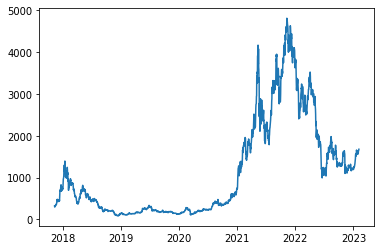

In [8]:
# Checking data via plot function
plt.plot(df.index, df['Adj Close'])
plt.show()

In [9]:
# length of dataframe
len(df)

1914

In [10]:
# Variable to hold 80% of the dataset
to_row = int(len(df)*0.8)

In [11]:
# Training the model
train = list(df[0:to_row]['Adj Close'])
train

[320.8840026855469,
 299.25299072265625,
 314.6809997558594,
 307.9079895019531,
 316.71600341796875,
 337.6310119628906,
 333.35699462890625,
 330.92401123046875,
 332.3940124511719,
 347.61199951171875,
 354.385986328125,
 366.7300109863281,
 360.4010009765625,
 380.6520080566406,
 410.1659851074219,
 474.9110107421875,
 466.2760009765625,
 471.3299865722656,
 480.3550109863281,
 472.9020080566406,
 427.52301025390625,
 447.114013671875,
 466.5400085449219,
 463.4490051269531,
 465.8529968261719,
 470.2040100097656,
 463.281005859375,
 428.5880126953125,
 434.4079895019531,
 456.031005859375,
 473.50201416015625,
 441.72100830078125,
 515.135986328125,
 651.4310302734375,
 702.7670288085938,
 695.8159790039062,
 684.447998046875,
 696.208984375,
 719.9749755859375,
 794.64501953125,
 826.822998046875,
 819.0859985351562,
 821.06298828125,
 674.8599853515625,
 719.3870239257812,
 694.1480102539062,
 765.833984375,
 773.8359985351562,
 762.8419799804688,
 737.0230102539062,
 753.591979

In [12]:
# Testing the model
test = list(df[to_row:]['Adj Close'])
test

[3164.025146484375,
 3095.825927734375,
 3001.1201171875,
 2557.931640625,
 2405.18115234375,
 2535.0390625,
 2440.352294921875,
 2455.93505859375,
 2468.0302734375,
 2423.001220703125,
 2547.092041015625,
 2597.084716796875,
 2603.466552734375,
 2688.27880859375,
 2792.1171875,
 2682.85400390625,
 2679.16259765625,
 2983.5869140625,
 3014.648193359375,
 3057.47607421875,
 3142.470703125,
 3122.608642578125,
 3239.45703125,
 3077.482177734375,
 2927.383544921875,
 2917.36279296875,
 2883.46337890625,
 2933.47900390625,
 3179.877197265625,
 3127.830078125,
 2881.48193359375,
 2785.7275390625,
 2763.701171875,
 2628.6484375,
 2573.816162109375,
 2639.29931640625,
 2590.359619140625,
 2598.067138671875,
 2764.53564453125,
 2781.11181640625,
 2621.8017578125,
 2919.201171875,
 2972.485107421875,
 2950.118408203125,
 2834.468994140625,
 2617.156005859375,
 2664.8310546875,
 2555.037353515625,
 2497.771240234375,
 2576.74755859375,
 2729.783447265625,
 2608.048583984375,
 2559.56298828125,
 

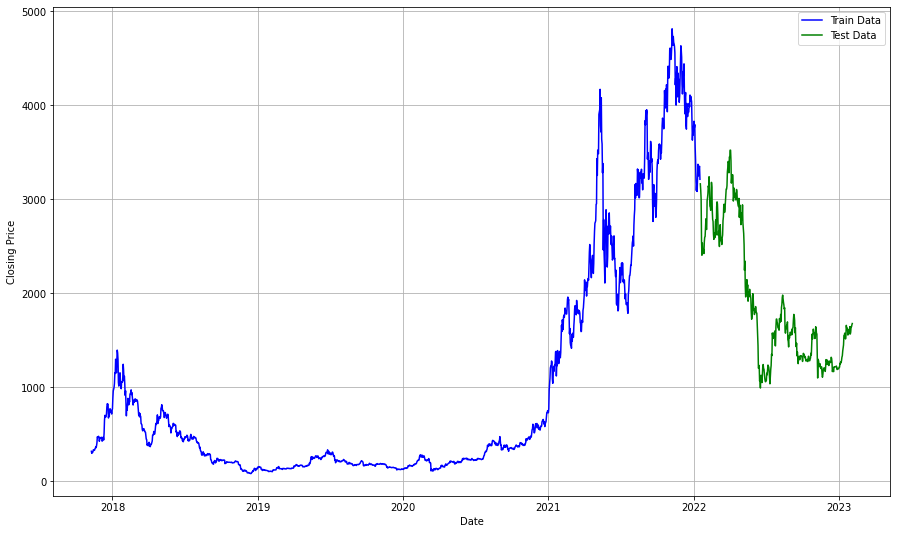

In [13]:
# Plotting train/ test data
plt.figure(figsize =(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label ='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'green', label ='Test Data')
plt.legend()

In [14]:
# ARIMA model 
model_predictions = []
test_obs = len(test)


In [15]:
# Future prediction
for i in range(test_obs):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  # print('Prediction' ,yhat)

Y Hat - The estimated or predicted values in a regression or other predictive model are termed the y-hat values. "Y" because y is the outcome or dependent variable in the model equation, and a "hat" symbol (circumflex) placed over the variable name is the statistical designation of an estimated value.

In [16]:
# ARIMA model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1912
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -11049.154
Method:                       css-mle   S.D. of innovations             78.250
Date:                Sat, 04 Feb 2023   AIC                          22110.308
Time:                        16:02:44   BIC                          22143.644
Sample:                             1   HQIC                         22122.576
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7060      1.824      0.387      0.699      -2.870       4.282
ar.L1.D.y     -0.0641      0.023     -2.804      0.005      -0.109      -0.019
ar.L2.D.y      0.0119      0.023      0.521      0.6

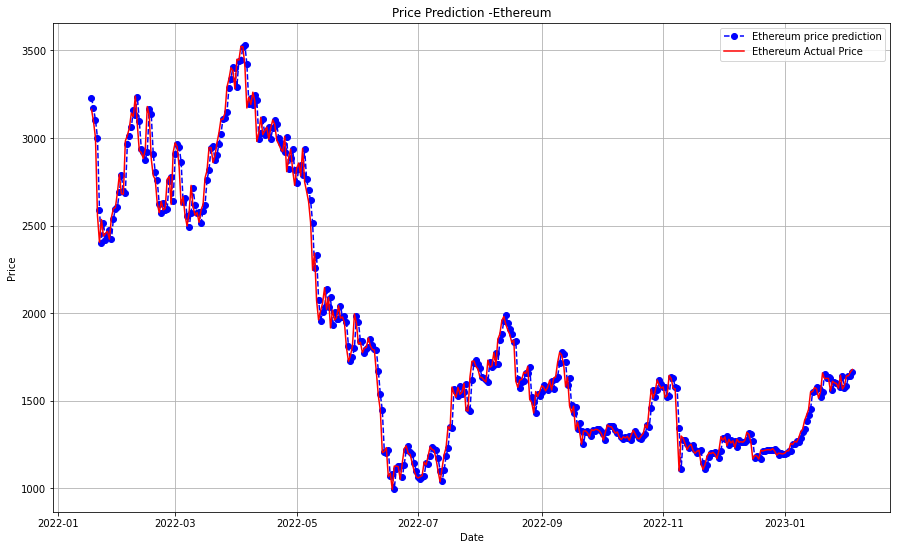

In [17]:
# Data visualization
plt.figure(figsize=(15,9))
plt.grid(True)
start_date = df[to_row:].index
plt.plot(start_date, model_predictions, color = 'blue', marker ='o', linestyle ='dashed', label ='Ethereum price prediction')
plt.plot(start_date, test, color ='red', label ='Ethereum Actual Price')
plt.title('Price Prediction -Ethereum')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions) -np.array(test))/np.abs(test))
# Checking Mean Absolute Percentage Error
print('MAPE:' +str(mape))

MAPE:0.03186386423850388


MAPE of 3.2% implies the model is 96.8% accurate in predicting the test obeservations

In [19]:
# Checking Root Mean Square Error
from math import sqrt
test = df[to_row:]['Adj Close']
print('Mean of test:',test.mean())
rmse = sqrt(mean_squared_error(test, model_predictions,))
print('Mean Squared Error:', rmse)

Mean of test: 1879.349810647591
Mean Squared Error: 85.5757379409745


In [20]:
# Prediction for next 5 days
prediction_next_5_days = []
for i in range(5):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  prediction_next_5_days.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  print('Prediction' ,yhat)

Prediction 1681.2775561776944
Prediction 3073.9206341421627
Prediction 3124.7394796240565
Prediction 3060.233928367177
Prediction 2643.586539824466


In [21]:
# Converting list to dataframe 
Prediction = pd.DataFrame(prediction_next_5_days)

In [22]:
#Reviewing dataframe
Prediction

,0
0,1681.277556
1,3073.920634
2,3124.739480
3,3060.233928
4,2643.586540


In [23]:
#Converting dataframe to csv for visualization
Prediction.to_csv('Ethereum_prediction.csv', header='Prediction', index=True)